Ever seen a fancy graph, where a curve represneting some trend is surrounded by a shaded region? Ever wondered what this region is and what it means? The shaded regions are typically what are known as confidence bands for some specific confidence level (1$\sigma$, 2$\sigma$, etc.). What they actually represent is rather subtle.

Confidnece bands represent the following: if you repeat the experiment many times and each time go through the procedure of estimating the fit parameters followed by calculation of confidence bands (for example at a confidence level of 68 %), then 68 % of these deifferent confidence bands will contain the true gradient and intercept. By 'true' I mean the values that describe the population from which data was generated/sampled from.

For a linear model, you can use a set of analytical expressions to estimate the confidence bands for your fitted model. The 68 % confidence ($1\sigma, t=1$) bands may be found from :

$\hat{y} \pm t\sigma \sqrt{\frac{1}{n_{d}} + \frac{(x - \bar{x})^{2}}{\sigma_{x}}}$.

Here $\hat{y}$ is the best estimate of the dependent variable found from linear regression. That is, $\hat{y} = ax +b$. $n_{d}$ is the total number of observations.

Other quantities in the equation above:

$\bar{x}=\left(\sum_{i}^{n_{d}}x_{i}\right) / n_{d}$,

$\sigma = \sqrt{\frac{\sum_{i}^{n_{d}}\left( y_{i} - \hat{y} \right) ^ {2}}{n_{d} - 2}}$,

$\sigma_{x} = \sum_{i}^{n_{d}}\left( x_{i} - \bar{x}\right) ^ {2}$.

Below I generate some synthetic data, using a linear model with some white noise added to it. Then I fit these data to a linear model and use the equations above to find confidence bands. I repeat this procedure a dozen times to give an intuition of what confidence bands represent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statistical.bootstrap_fit import BootStrapCB
from statistical.util import linear_model_p1, single_exponential_model, sinusoid

plt.rcParams['axes.linewidth'] = 2.0
font = {'family' : 'DejaVu Sans',
       'weight' : 'normal',
       'size' : 13.5}
plt.rc('font', **font)

In [2]:
pop_a = 2.0  # Population gradient.
pop_b = 1.0  # Population offset.
n_p = 15  # Number of points


def generate_data(pop_a, pop_b, n_p):
    x = np.linspace(0, 20, n_p)
    y_synth = linear_model_p1(x, pop_a, pop_b) + np.random.normal(0, 5.0, n_p)
    return x, y_synth

In [3]:
x, y_synth = generate_data(pop_a, pop_b, n_p)

boot_strap = BootStrapCB(x, y_synth, model='linear')

cbs = boot_strap.evaluate_bootstrapped_cb()
cbs_cl = boot_strap.evaluate_classical_lm_cb()

params = boot_strap.single_fit()

0 / 1000 unsuccessful model parameter estimations


(-1.0, 21.0)

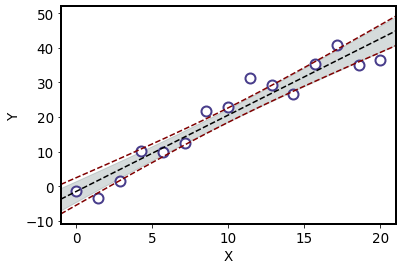

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(x, y_synth, marker='o', markersize=10, markeredgewidth=2, linestyle = '', color='darkslateblue', markerfacecolor='w')
ax.plot(np.arange(-1.0, 22.0), linear_model_p1(np.arange(-1.0, 22.0), *params), color='black', linestyle='--')
ax.fill_between(cbs[0][0], cbs[0][1], cbs[1][1], color='darkslategrey', alpha=0.2)
ax.plot(cbs_cl[0][0], cbs_cl[0][1], color='maroon', linestyle='--')
ax.plot(cbs_cl[1][0], cbs_cl[1][1], color='maroon', linestyle='--')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-1.0, 21.0])

The black dashed line in the above is the best fit line for the data generated. The shaded regions are the 2$\sigma$ confidence bands, calculated using a bootstrap. The red dashed lines are also the 2$\sigma$ confidence bands, but calculatated using the analytical expressions above. Evidently, both methods give nearly the same result.

Now, I draw data from the fixed distribution, with a = 2.0 and b = 1.0, refit to a linear model and calculate the confidence bands (this time 1$\sigma$, to make the message a bit more clear visually) using a bootstrap:

0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations
0 / 1000 unsuccessful model parameter estimations


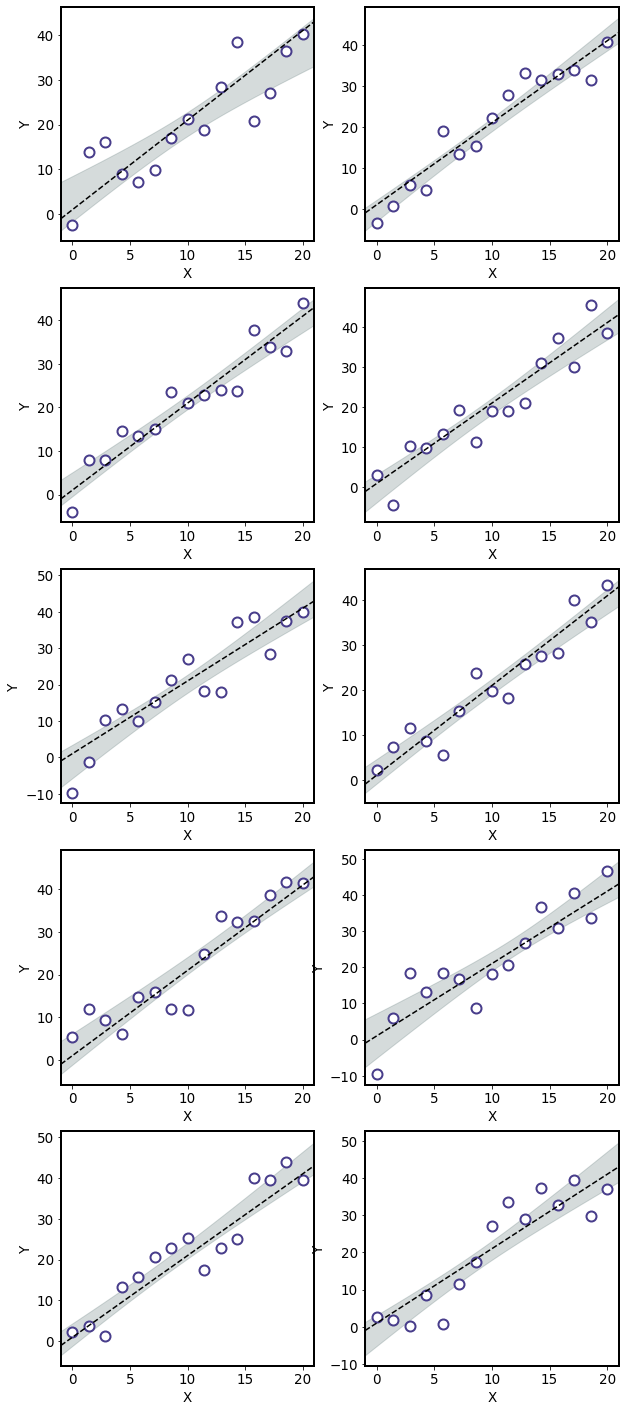

In [5]:
fig, ax = plt.subplots(5, 2, figsize=(10,25))

for i in ax.flatten():
    x, y_synth = generate_data(pop_a, pop_b, n_p)
    boot_strap = BootStrapCB(x, y_synth, model='linear', ci=0.67)
    cbs = boot_strap.evaluate_bootstrapped_cb()
    params = boot_strap.single_fit()
    i.plot(x, y_synth, marker='o', markersize=10, markeredgewidth=2, linestyle = '', color='darkslateblue', markerfacecolor='w')
    i.plot(np.arange(-1.0, 22.0), linear_model_p1(np.arange(-1.0, 22.0), pop_a, pop_b), color='black', linestyle='--')
    i.fill_between(cbs[0][0], cbs[0][1], cbs[1][1], color='darkslategrey', alpha=0.2)
    i.set_xlabel('X')
    i.set_ylabel('Y')
    i.set_xlim([-1.0, 21.0])

Can see that in roughly 70% of draws, the confidence bands fully contain the population line.

Using the bootstrap to compute confidence bands for a linear model fit is not very useful. It is more practical to just use the equations above. On the other hand, I am not aware of similar equations for an arbitrary non-linear model and doubt that these exist at all. This is were the bootstrap becomes very handy. Same ideas apply. Lets try to estimate confidence bands for an exponential model fit using the bootstrap.

In [27]:
pop_a = 1.0
pop_b = 0.1
pop_tau = 12.0
n_p = 30

def generate_data_exp(pop_a, pop_b, pop_tau, n_p):
    x = np.linspace(0, 20, n_p)
    y_synth = single_exponential_model(x, pop_a, pop_b, pop_tau) + np.random.normal(0, 0.1, n_p)
    return x, y_synth

In [28]:
x, y_synth = generate_data_exp(pop_a, pop_b, pop_tau, n_p)

boot_strap = BootStrapCB(x, y_synth, model='single_exponential')

cbs = boot_strap.evaluate_bootstrapped_cb()

cbs_classical = boot_strap.evaluate_classical_lm_cb()

params = boot_strap.single_fit()

0 / 1000 unsuccessful model parameter estimations


Text(0.5, 1.0, 'Analytical linear model confidence bands')

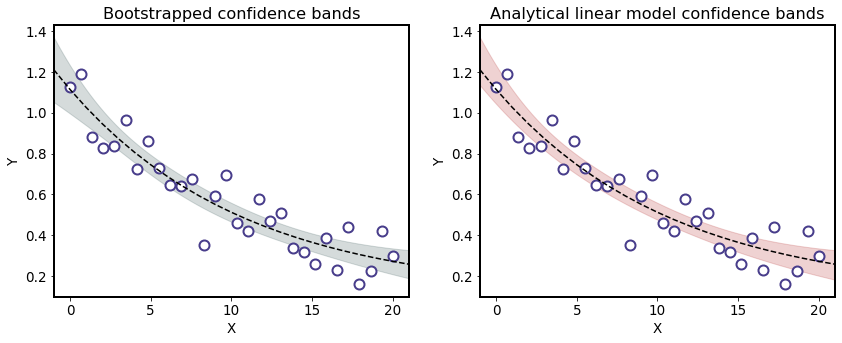

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(x, y_synth, marker='o', markersize=10, markeredgewidth=2, linestyle = '', color='darkslateblue', markerfacecolor='w')
ax[0].plot(np.arange(-1.0, 22.0), single_exponential_model(np.arange(-1.0, 22.0), *params), color='black', linestyle='--')
ax[0].fill_between(cbs[0][0], cbs[0][1], cbs[1][1], color='darkslategrey', alpha=0.2)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_xlim([-1.0, 21.0])
ax[0].set_title('Bootstrapped confidence bands')
ax[1].plot(x, y_synth, marker='o', markersize=10, markeredgewidth=2, linestyle = '', color='darkslateblue', markerfacecolor='w')
ax[1].plot(np.arange(-1.0, 22.0), single_exponential_model(np.arange(-1.0, 22.0), *params), color='black', linestyle='--')
ax[1].fill_between(cbs_classical[0][0], cbs_classical[0][1], cbs[1][1], color='firebrick', alpha=0.2)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_xlim([-1.0, 21.0])
ax[1].set_title('Analytical linear model confidence bands')

The lower band estimate seems to be consistently 'narrower' compared to the upper when using the analytcal formulas. Need to think why this is...

As a final example, lets generate some sinusoidal data, fit these data to a sinusoid model and, again, find confidence bands.

In [51]:
pop_a = 1.0
pop_omega = 0.42
pop_phi = 0.12
pop_c = 0.0
n_p = 20  # Number of points

def generate_data_sin(pop_a, pop_omega, pop_phi, pop_c):
    x = np.linspace(0, 20, n_p)
    y_synth = sinusoid(x, pop_a, pop_omega, pop_phi, pop_c) + np.random.normal(0, 0.5, n_p)
    return x, y_synth

In [52]:
x, y_synth = generate_data_sin(pop_a, pop_omega, pop_phi, pop_c)

boot_strap = BootStrapCB(x, y_synth, p_init=np.array([1.0, 0.42, 0.12, 0.0]), model='sinusoid')

cbs = boot_strap.evaluate_bootstrapped_cb()

cbs_classical = boot_strap.evaluate_classical_lm_cb()

params = boot_strap.single_fit()

0 / 1000 unsuccessful model parameter estimations


Text(0.5, 1.0, 'Analytical linear model confidence bands')

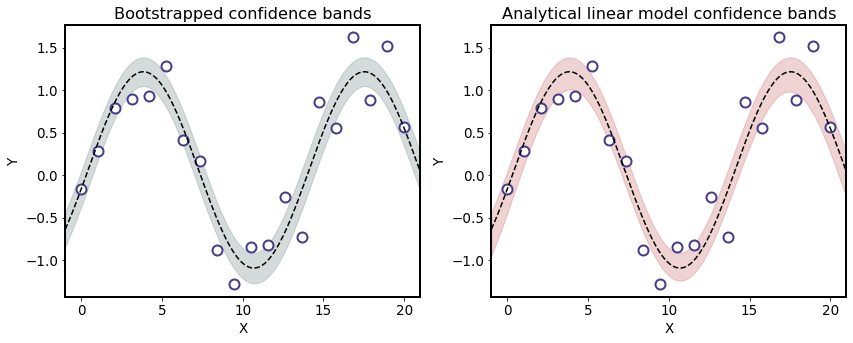

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(x, y_synth, marker='o', markersize=10, markeredgewidth=2, linestyle = '', color='darkslateblue', markerfacecolor='w')
ax[0].plot(np.arange(-1.0, 22.0, 0.1), sinusoid(np.arange(-1.0, 22.0, 0.1), *params), color='black', linestyle='--')
ax[0].fill_between(cbs[0][0], cbs[0][1], cbs[1][1], color='darkslategrey', alpha=0.2)
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_xlim([-1.0, 21.0])
ax[0].set_title('Bootstrapped confidence bands')
ax[1].plot(x, y_synth, marker='o', markersize=10, markeredgewidth=2, linestyle = '', color='darkslateblue', markerfacecolor='w')
ax[1].plot(np.arange(-1.0, 22.0, 0.1), sinusoid(np.arange(-1.0, 22.0, 0.1), *params), color='black', linestyle='--')
ax[1].fill_between(cbs_classical[0][0], cbs_classical[0][1], cbs[1][1], color='firebrick', alpha=0.2)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_xlim([-1.0, 21.0])
ax[1].set_title('Analytical linear model confidence bands')